In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [2]:
mini_df = pd.read_csv('model_data/mini_df.csv')
mini_df_fill = pd.read_csv('model_data/mini_df_fill.csv')
nn_df = pd.read_csv('model_data/nn_df.csv')

In [3]:
mini_df

,end_of_period,total_assets,noncurrent_assets,current_assets,equity_shareholders_of_the_parent,noncurrent_liabilities,current_liabilities,number_of_shares,sector,target,...,noncurrent_assets_change_1y,noncurrent_assets_change_2y,current_assets_change_1y,current_assets_change_2y,total_liabilities_change_1y,total_liabilities_change_2y,current_liabilities_change_1y,current_liabilities_change_2y,noncurrent_liabilities_change_1y,noncurrent_liabilities_change_2y
0,2011-03-31,1342.0,86.0,1256.0,1221.0,0.0,110.0,1870.76,gry,41881.66,...,30.13,30.13,-40.49,-40.49,25.85,25.85,25.85,25.85,0.0,0.0
1,2011-03-31,1342.0,86.0,1256.0,1221.0,0.0,110.0,1870.76,gry,41881.66,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
2,2011-06-30,1659.0,103.0,1556.0,1595.0,0.0,64.0,1870.76,gry,26705.11,...,17.00,17.00,300.00,300.00,-46.00,-46.00,-46.00,-46.00,0.0,0.0
3,2011-06-30,1659.0,103.0,1556.0,1595.0,0.0,64.0,1870.76,gry,26705.11,...,0.00,17.00,0.00,300.00,0.00,-46.00,0.00,-46.00,0.0,0.0
4,2011-09-30,2141.0,85.0,2055.0,2060.0,0.0,81.0,1870.76,gry,12955.02,...,-18.00,-18.00,499.00,499.00,17.00,17.00,17.00,17.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,2022-03-31,2741947.0,1723917.0,1018030.0,254238.0,620050.0,1867659.0,10271.34,napoje,5228110.53,...,0.00,-72866.00,0.00,165509.00,0.00,233855.00,0.00,-321630.00,0.0,555485.0
16536,2022-06-30,2981239.0,1730362.0,1250877.0,288397.0,1061326.0,1631516.0,10271.34,napoje,5040658.63,...,6445.00,6445.00,232847.00,232847.00,205133.00,205133.00,-236143.00,-236143.00,441276.0,441276.0
16537,2022-06-30,2981239.0,1730362.0,1250877.0,288397.0,1061326.0,1631516.0,10271.34,napoje,5040658.63,...,0.00,6445.00,0.00,232847.00,0.00,205133.00,0.00,-236143.00,0.0,441276.0
16538,2022-09-30,2733389.0,1720912.0,1012477.0,304293.0,960672.0,1468424.0,10271.34,napoje,4884020.74,...,-9450.00,-9450.00,-238400.00,-238400.00,-263746.00,-263746.00,-163092.00,-163092.00,-100654.0,-100654.0


In [4]:
mini_df_fill

,end_of_period,total_assets,noncurrent_assets,current_assets,equity_shareholders_of_the_parent,noncurrent_liabilities,current_liabilities,number_of_shares,sector,target,...,noncurrent_assets_change_1y,noncurrent_assets_change_2y,current_assets_change_1y,current_assets_change_2y,total_liabilities_change_1y,total_liabilities_change_2y,current_liabilities_change_1y,current_liabilities_change_2y,noncurrent_liabilities_change_1y,noncurrent_liabilities_change_2y
0,2010-12-31,1352.36,55.87,1296.49,1268.2,0.0,84.15,1870.76,gry,14208.43,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
1,2010-12-31,1352.36,55.87,1296.49,1268.2,0.0,84.15,1870.76,gry,14208.43,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
2,2011-03-31,1342.00,86.00,1256.00,1221.0,0.0,110.00,1870.76,gry,41881.66,...,30.13,30.13,-40.49,-40.49,25.85,25.85,25.85,25.85,0.0,0.0
3,2011-03-31,1342.00,86.00,1256.00,1221.0,0.0,110.00,1870.76,gry,41881.66,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
4,2011-06-30,1659.00,103.00,1556.00,1595.0,0.0,64.00,1870.76,gry,26705.11,...,17.00,17.00,300.00,300.00,-46.00,-46.00,-46.00,-46.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17123,2022-03-31,2741947.00,1723917.00,1018030.00,254238.0,620050.0,1867659.00,10271.34,napoje,5228110.53,...,0.00,-72866.00,0.00,165509.00,0.00,233855.00,0.00,-321630.00,0.0,555485.0
17124,2022-06-30,2981239.00,1730362.00,1250877.00,288397.0,1061326.0,1631516.00,10271.34,napoje,5040658.63,...,6445.00,6445.00,232847.00,232847.00,205133.00,205133.00,-236143.00,-236143.00,441276.0,441276.0
17125,2022-06-30,2981239.00,1730362.00,1250877.00,288397.0,1061326.0,1631516.00,10271.34,napoje,5040658.63,...,0.00,6445.00,0.00,232847.00,0.00,205133.00,0.00,-236143.00,0.0,441276.0
17126,2022-09-30,2733389.00,1720912.00,1012477.00,304293.0,960672.0,1468424.00,10271.34,napoje,4884020.74,...,-9450.00,-9450.00,-238400.00,-238400.00,-263746.00,-263746.00,-163092.00,-163092.00,-100654.0,-100654.0


In [5]:
nn_df

,end_of_period,revenues_from_sales,operating_profitloss,net_profitloss_attributable_to_equity_holders_of_the_parent,depreciation,cash_flow_from_operating_activities,cash_flow_from_investing_activities,cash_flow_from_financing_activities,total_assets,noncurrent_assets,...,noncurrent_assets_change_1y,noncurrent_assets_change_2y,current_assets_change_1y,current_assets_change_2y,total_liabilities_change_1y,total_liabilities_change_2y,current_liabilities_change_1y,current_liabilities_change_2y,noncurrent_liabilities_change_1y,noncurrent_liabilities_change_2y
0,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,1352.36,55.87,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
1,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,1352.36,55.87,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
2,2011-03-31,144.0,0.0,-50.0,0.0,0.0,0.0,0.0,1342.00,86.00,...,30.13,30.13,-40.49,-40.49,25.85,25.85,25.85,25.85,0.0,0.0
3,2011-03-31,144.0,0.0,-50.0,0.0,0.0,0.0,0.0,1342.00,86.00,...,0.00,30.13,0.00,-40.49,0.00,25.85,0.00,25.85,0.0,0.0
4,2011-06-30,959.0,0.0,377.0,7.0,0.0,0.0,0.0,1659.00,103.00,...,17.00,17.00,300.00,300.00,-46.00,-46.00,-46.00,-46.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17123,2022-03-31,696778.0,6649.0,-1246.0,38391.0,13967.0,-33280.0,57099.0,2741947.00,1723917.00,...,0.00,-72866.00,0.00,165509.00,0.00,233855.00,0.00,-321630.00,0.0,555485.0
17124,2022-06-30,1209418.0,101579.0,92625.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,1730362.00,...,6445.00,6445.00,232847.00,232847.00,205133.00,205133.00,-236143.00,-236143.00,441276.0,441276.0
17125,2022-06-30,1209418.0,101579.0,92625.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,1730362.00,...,0.00,6445.00,0.00,232847.00,0.00,205133.00,0.00,-236143.00,0.0,441276.0
17126,2022-09-30,1106635.0,61538.0,23844.0,40212.0,156461.0,-24386.0,-117588.0,2733389.00,1720912.00,...,-9450.00,-9450.00,-238400.00,-238400.00,-263746.00,-263746.00,-163092.00,-163092.00,-100654.0,-100654.0


In [6]:
dataframes = [mini_df, nn_df, mini_df_fill]

In [7]:
# OneHotEncoding
encoded_dataframes = []

for df in dataframes:
    encoded_df = pd.get_dummies(df)
    encoded_dataframes.append(encoded_df)

In [8]:
# Scaling
scaler = StandardScaler()

scaled_dataframes = []
for encoded_df in encoded_dataframes:
    scaled_array = scaler.fit_transform(encoded_df)
    scaled_df = pd.DataFrame(scaled_array, columns=encoded_df.columns)
    scaled_dataframes.append(scaled_df)

In [9]:
mini_df_scaled_path = "mini_df_scaled.csv"
nn_df_scaled_path = "nn_df_scaled.csv"
mini_df_fill_scaled_path = "mini_df_fill_scaled.csv"

scaled_dataframes[0].to_csv(mini_df_scaled_path, index=False)
scaled_dataframes[1].to_csv(nn_df_scaled_path, index=False)
scaled_dataframes[2].to_csv(mini_df_fill_scaled_path, index=False)

In [10]:
# Model-ready files
nn_df = pd.read_csv(nn_df_scaled_path)
mini_df = pd.read_csv(mini_df_scaled_path)
mini_df_fill = pd.read_csv(mini_df_fill_scaled_path)

In [11]:
# Data Split

# nn_df
# target_column = 'target'
# X = nn_df.drop(columns=[target_column])
# y = nn_df[target_column]

# mini_df
# target_column = 'target'
# X = mini_df.drop(columns=[target_column])
# y = mini_df[target_column]

# mini_df_fill
target_column = 'target'
X = mini_df_fill.drop(columns=[target_column])
y = mini_df_fill[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# data conversion - to tensor
X_train = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


# dataloader creation
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# LSTM

In [13]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = X_train.shape[2]
hidden_size = 50
num_layers = 2

model = LSTMModel(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# model training
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50):
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item() * inputs.size(0)
        test_loss = test_loss / len(test_loader.dataset)
        test_losses.append(test_loss)
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    loss_df = pd.DataFrame({'Epoch': list(range(1, epochs + 1)), 'Train Loss': train_losses, 'Test Loss': test_losses})
    loss_df.to_csv("lstm_training_results.csv", index=False)

In [15]:
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)

Epoch 1/50, Train Loss: 0.7249, Test Loss: 0.6354
Epoch 2/50, Train Loss: 0.4994, Test Loss: 0.5828
Epoch 3/50, Train Loss: 0.4452, Test Loss: 0.5652
Epoch 4/50, Train Loss: 0.4079, Test Loss: 0.5533
Epoch 5/50, Train Loss: 0.3649, Test Loss: 0.4752
Epoch 6/50, Train Loss: 0.2667, Test Loss: 0.3923
Epoch 7/50, Train Loss: 0.1853, Test Loss: 0.3134
Epoch 8/50, Train Loss: 0.1380, Test Loss: 0.2866
Epoch 9/50, Train Loss: 0.1005, Test Loss: 0.1884
Epoch 10/50, Train Loss: 0.0677, Test Loss: 0.1837
Epoch 11/50, Train Loss: 0.0555, Test Loss: 0.1885
Epoch 12/50, Train Loss: 0.0466, Test Loss: 0.1452
Epoch 13/50, Train Loss: 0.0435, Test Loss: 0.1562
Epoch 14/50, Train Loss: 0.0385, Test Loss: 0.1456
Epoch 15/50, Train Loss: 0.0356, Test Loss: 0.1551
Epoch 16/50, Train Loss: 0.0360, Test Loss: 0.1488
Epoch 17/50, Train Loss: 0.0336, Test Loss: 0.1428
Epoch 18/50, Train Loss: 0.0264, Test Loss: 0.1230
Epoch 19/50, Train Loss: 0.0241, Test Loss: 0.1453
Epoch 20/50, Train Loss: 0.0264, Test Lo

In [16]:
# model evaluation
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy())
            actuals.extend(targets.numpy())
    return np.array(predictions), np.array(actuals)

y_pred, y_true = evaluate_model(model, test_loader)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.24416862428188324
MAE: 0.049858417361974716
R²: 0.9422182315559285


# CNN

In [17]:
# nn_df
# target_column = 'target'
# X = nn_df.drop(columns=[target_column]).values
# y = nn_df[target_column].values

# mini_df
# target_column = 'target'
# X = mini_df.drop(columns=[target_column]).values
# y = mini_df[target_column].values

# mini_df_fill
target_column = 'target'
X = mini_df_fill.drop(columns=[target_column]).values
y = mini_df_fill[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train = X_train.reshape(-1, 1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, 1, X_test.shape[1], 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [19]:
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [20]:
class ModelCNN(nn.Module):
    def __init__(self):
        super(ModelCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(3, 1))
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(3, 1))
        self.fc1 = nn.Linear(32 * (X_train.shape[2] - 4), 50)
        self.fc2 = nn.Linear(50, 1)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ModelCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
# model training
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50):
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, targets.squeeze())
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        
        train_losses.append(epoch_loss)
        
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, targets.squeeze())
                test_loss += loss.item() * inputs.size(0)
        test_loss = test_loss / len(test_loader.dataset)
        test_losses.append(test_loss)
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}')

    
    loss_df = pd.DataFrame({'Epoch': list(range(1, epochs + 1)), 'Train Loss': train_losses, 'Test Loss': test_losses})
    loss_df.to_csv("cnn_training_results.csv", index=False)

In [22]:
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)

Epoch 1/50, Train Loss: 0.6639, Test Loss: 0.7408
Epoch 2/50, Train Loss: 0.6019, Test Loss: 0.6630
Epoch 3/50, Train Loss: 0.5315, Test Loss: 0.7311
Epoch 4/50, Train Loss: 0.4673, Test Loss: 0.5525
Epoch 5/50, Train Loss: 0.4075, Test Loss: 0.4396
Epoch 6/50, Train Loss: 0.3441, Test Loss: 0.4157
Epoch 7/50, Train Loss: 0.2377, Test Loss: 0.3960
Epoch 8/50, Train Loss: 0.1860, Test Loss: 0.2332
Epoch 9/50, Train Loss: 0.1637, Test Loss: 0.2304
Epoch 10/50, Train Loss: 0.1439, Test Loss: 0.2241
Epoch 11/50, Train Loss: 0.1253, Test Loss: 0.2126
Epoch 12/50, Train Loss: 0.1198, Test Loss: 0.2021
Epoch 13/50, Train Loss: 0.0979, Test Loss: 0.2546
Epoch 14/50, Train Loss: 0.0859, Test Loss: 0.1951
Epoch 15/50, Train Loss: 0.0858, Test Loss: 0.1637
Epoch 16/50, Train Loss: 0.0605, Test Loss: 0.1581
Epoch 17/50, Train Loss: 0.0527, Test Loss: 0.1949
Epoch 18/50, Train Loss: 0.0468, Test Loss: 0.1454
Epoch 19/50, Train Loss: 0.0409, Test Loss: 0.1314
Epoch 20/50, Train Loss: 0.0382, Test Lo

In [23]:
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs).squeeze()
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())
    return np.array(predictions), np.array(actuals)

# model evaluation
y_pred, y_true = evaluate_model(model, test_loader)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.3729096055030823
MAE: 0.07796270400285721
R²: 0.86522224288545


# Results Summary and Comparison

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Complete DF with everything connected to assets and capital (+additional columns for change)

In [26]:
lstm_data = pd.read_csv('lstm_training_results.csv')
cnn_data = pd.read_csv('cnn_training_results.csv')

In [27]:
lstm_data.columns = ['Epoch', 'Train_Loss', 'Test_Loss']
cnn_data.columns = ['Epoch', 'Train_Loss', 'Test_Loss']

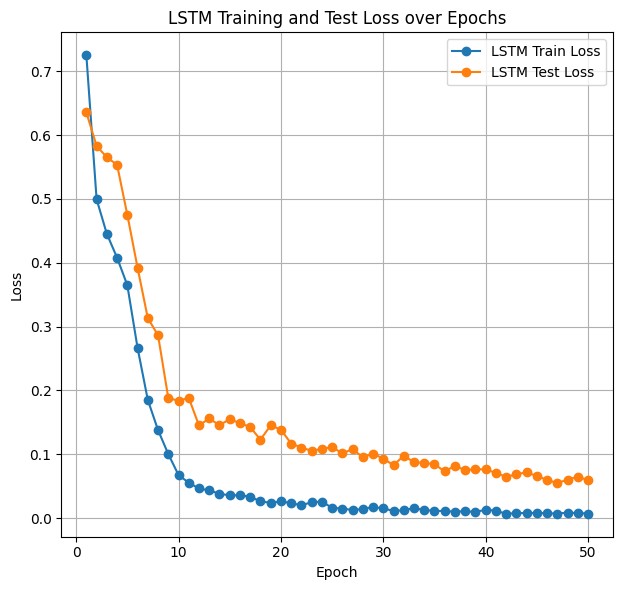

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_data['Epoch'], lstm_data['Train_Loss'], label='LSTM Train Loss', marker='o')
plt.plot(lstm_data['Epoch'], lstm_data['Test_Loss'], label='LSTM Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

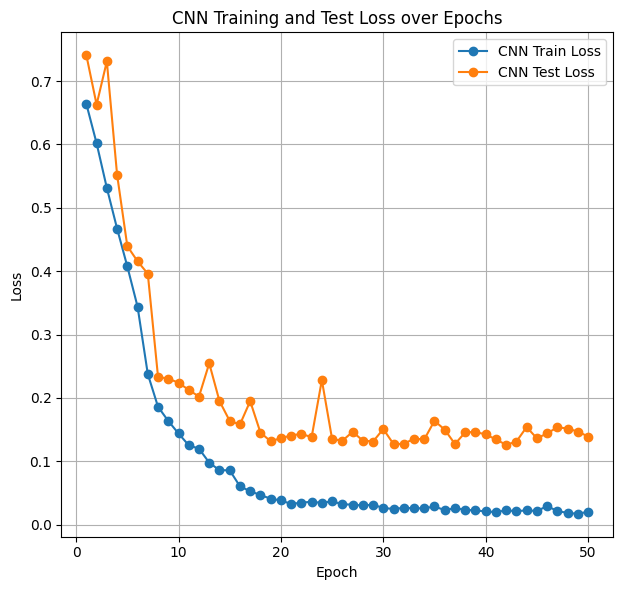

In [29]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(cnn_data['Epoch'], cnn_data['Train_Loss'], label='CNN Train Loss', marker='o')
plt.plot(cnn_data['Epoch'], cnn_data['Test_Loss'], label='CNN Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
# Restricted DF with only main assets and capital values (+ additional columns for change)

# lstm_results
RMSE: 0.3462441861629486
MAE: 0.14099374413490295
R²: 0.9200827409988592

# cnn_results
RMSE: 0.3420768976211548
MAE: 0.12758944928646088
R²: 0.9219948847835346

In [31]:
lstm_data = pd.read_csv('mini/lstm_training_results.csv')
cnn_data = pd.read_csv('mini/cnn_training_results.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'mini/lstm_training_results.csv'

In [ ]:
lstm_data.columns = ['Epoch', 'Train_Loss', 'Test_Loss']
cnn_data.columns = ['Epoch', 'Train_Loss', 'Test_Loss']

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_data['Epoch'], lstm_data['Train_Loss'], label='LSTM Train Loss', marker='o')
plt.plot(lstm_data['Epoch'], lstm_data['Test_Loss'], label='LSTM Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(cnn_data['Epoch'], cnn_data['Train_Loss'], label='CNN Train Loss', marker='o')
plt.plot(cnn_data['Epoch'], cnn_data['Test_Loss'], label='CNN Test Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()